First, we load our data.  This time, I'm adding a column of 1s directly to the dataframe, so that it's already there later on when we want to build new sets of training data.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import label_binarize

data = pd.read_csv('data.txt')
data.insert(0, '1', 1)

X = data.as_matrix(columns=['1', 'alcohol', 'alcalinity'])
y = np.matrix(label_binarize(data['class'], [1, 2, 3]))[:,0]

In [2]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(len(X_train), len(X_test))

142 36


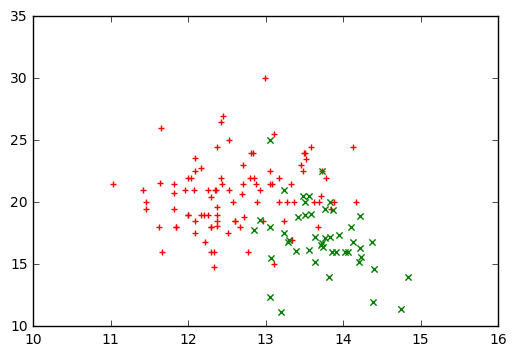

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

def filter_by_label(X, y, v):
    return np.matrix([X[i,:] for i in range(len(X)) if y[i,0] == v])

x0 = filter_by_label(X_train, y_train, 0)
x1 = filter_by_label(X_train, y_train, 1)
plt.scatter(x0[:,1], x0[:,2], marker='+', color='red')
plt.scatter(x1[:,1], x1[:,2], marker='x', color='green')

In [8]:
import numpy as np

def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def predict(X, theta):
    return sigmoid(X * np.matrix(theta).T) >= 0.5

def cost(theta, X, y):
    theta = np.matrix(theta)
    
    h = sigmoid(np.matmul(X, theta.T))
    y1 = np.multiply(-y, np.log(h))
    y0 = np.multiply((1 - y), np.log(1 - h))
    j = np.sum(y1 - y0) / (len(X))
    return j

def gradient(theta, X, y):
    error = sigmoid(X * np.matrix(theta).T) - y
    grad = (1/len(X)) * np.matmul(X.T, error)
    
    return grad

def descent(theta, X, y, iterations):
    for i in range(iterations):
        theta = theta = gradient(theta, X, y)

In [20]:
import scipy.optimize as opt  

result = opt.fmin_tnc(func=cost, x0=np.zeros(3), fprime=gradient, args=(X_train, y_train))
theta = result[0]

print('theta: ', theta)
print('cost:', cost(theta, X, y))

theta:  [-32.35439293   3.18223112  -0.54671801]
cost: 0.256649493311


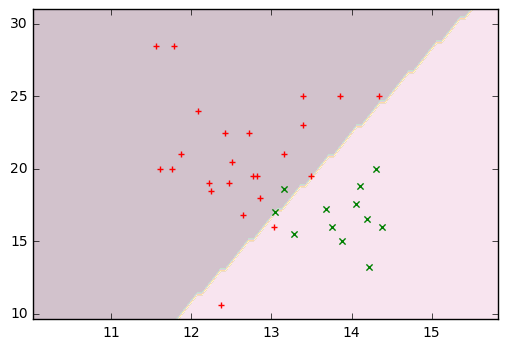

In [22]:
from matplotlib import cm

def plot_boundary(X, theta):
    
    x_min, x_max = X[:,1].min() - 1, X[:,1].max() + 1
    y_min, y_max = X[:,2].min() - 1, X[:,2].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(-10, y_max, 100)
    )

    inputs = np.c_[np.ones(10000), xx.ravel(), yy.ravel()]
    predictions = predict(inputs, theta).reshape(xx.shape)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)  
    plt.contourf(xx, yy, predictions, cmap=cm.Pastel1)
    
plot_boundary(X, theta)

x0 = filter_by_label(X_test, y_test, 0)
x1 = filter_by_label(X_test, y_test, 1)
plt.scatter(x0[:,1], x0[:,2], marker='+', color='red')
plt.scatter(x1[:,1], x1[:,2], marker='x', color='green')